##### <hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='images\header.jpeg' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/1</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div> 


 <hr style="height:5px"> 

    
<h2>Tratamento de dados -- <a href="https://www.kaggle.com/datasets/gauravkumar2525/kepler-exoplanet-dataset">Exoplanets</a></h2>

<a href="https://github.com/miguelccs10">Miguel C. Costa Sousa</a>

 <hr style="height:2px"> 
 
---


## 1. Importação das Bibliotecas e do Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
file_path = 'archive\\exoplanets_data.csv'
df = pd.read_csv(file_path)

# Visualizar primeiras linhas
print("Bibliotecas e dados carregados!")

Bibliotecas e dados carregados!


## 2. Informações iniciais

Exibir as informações básicas do conjunto de dados: número de linhas, colunas e tipos de dados.

<p align="center">
  <img src="images\planets.png" alt="Banner Exoplanetas" width="600">
</p>


In [ ]:
# Exibir uma amostra do dataset
display(df.head(10))

,kepid,kepoi_name,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
0,10797460,K00752.01,2,1.000,9.488036,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,10797460,K00752.02,2,0.969,54.418383,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
2,10811496,K00753.01,1,0.000,19.899140,14.60,638.0,39.30,5853.0,0.868,4.544,15.436
3,10848459,K00754.01,0,0.000,1.736952,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,10854555,K00755.01,2,1.000,2.525592,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509
5,10872983,K00756.01,2,1.000,11.094321,3.90,835.0,114.81,6046.0,0.972,4.486,15.714
6,10872983,K00756.02,2,1.000,4.134435,2.77,1160.0,427.65,6046.0,0.972,4.486,15.714
7,10872983,K00756.03,2,0.992,2.566589,1.59,1360.0,807.74,6046.0,0.972,4.486,15.714
8,6721123,K00114.01,0,0.000,7.361790,39.21,1342.0,767.22,6227.0,1.958,3.986,12.660
9,10910878,K00757.01,2,1.000,16.068647,5.76,600.0,30.75,5031.0,0.848,4.485,15.841


---
## 3. Pré-processamento dos dados

### 3.1 Limpeza de atributos irrelevantes para analise básica

In [8]:
# Remover colunas irrelevantes
df = df.drop(columns=['kepid', 'kepoi_name'])

# Verificar o resultado
display(df.head())


,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
0,2,1.000,9.488036,2.26,793.0,93.59,5455.0,0.927,4.467,15.347
1,2,0.969,54.418383,2.83,443.0,9.11,5455.0,0.927,4.467,15.347
2,1,0.000,19.899140,14.60,638.0,39.30,5853.0,0.868,4.544,15.436
3,0,0.000,1.736952,33.46,1395.0,891.96,5805.0,0.791,4.564,15.597
4,2,1.000,2.525592,2.75,1406.0,926.16,6031.0,1.046,4.438,15.509


### 3.2 Verificação de valores faltantes

Verificar se há dados ausentes nas colunas do dataset para decidir como tratá-los.

In [10]:
# Verificar e exibir valores nulos de forma organizada
missing_data = pd.DataFrame({
    'Coluna': df.columns,
    'Total de Valores Faltantes': df.isnull().sum().values
})

# Exibir apenas colunas que possuem valores faltantes
display(missing_data[missing_data['Total de Valores Faltantes'] > 0])

# Caso não haja valores faltantes, exibir mensagem
if missing_data['Total de Valores Faltantes'].sum() == 0:
    print("✅ Não há valores faltantes no dataset.")


,Coluna,Total de Valores Faltantes


✅ Não há valores faltantes no dataset.


### 3.3 Remoção de linhas duplicadas

Verificar e eliminar registros duplicados, que podem comprometer a análise.

In [12]:
# Verificar registros duplicados
total_duplicados = df.duplicated().sum()

print(f"🔍 Total de linhas duplicadas encontradas: {total_duplicados}")

# Remover duplicados, se houver
if total_duplicados > 0:
    df = df.drop_duplicates()
    print("✅ Linhas duplicadas removidas com sucesso!")
else:
    print("✅ Nenhuma linha duplicada foi encontrada no dataset.")


🔍 Total de linhas duplicadas encontradas: 0
✅ Nenhuma linha duplicada foi encontrada no dataset.


## 4. Correção de tipos de dados

Corrigir tipos de dados ajuda a evitar erros durante o processamento e análise. Neste caso, garantimos que a coluna kepoi_name seja tratada como texto, pois ela contém apenas identificadores e não será utilizada em cálculos.

In [14]:
# Correção do tipo de dados

# A coluna 'kepoi_name' contém identificadores dos planetas.
# Por padrão, pode ter sido lida como 'object' ou outro tipo.
# Vamos garantir que ela seja do tipo string (texto).

#df['kepoi_name'] = df['kepoi_name'].astype(str)

# Verificar o tipo de dados atualizado
#print("Tipos de dados após correção:")
#print(df.dtypes)


(Nesta etapa, a correção de tipos de dados não foi necessária, pois os identificadores que exigiam ajuste foram removidos no pré-processamento)

## 5. Tratamento de valores faltantes

Preencher valores faltantes com a média dos dados numéricos, evitando perda de informações.

In [17]:
# Tratamento de valores faltantes

# Verificar se há valores faltantes
total_missing = df.isnull().sum().sum()

print(f"🔍 Total de valores faltantes encontrados: {total_missing}")

# Preencher valores faltantes, se houver
if total_missing > 0:
    for col in df.select_dtypes(include=['float', 'int']).columns:
        media = df[col].mean()
        df[col].fillna(media, inplace=True)
        print(f"➡️ Valores faltantes na coluna '{col}' preenchidos com a média: {media:.2f}")
    print("✅ Valores faltantes tratados com sucesso!")
else:
    print("✅ Não há valores faltantes no dataset.")


🔍 Total de valores faltantes encontrados: 0
✅ Não há valores faltantes no dataset.


## 6. Verificação de dados inconsistentes

In [19]:
# Verificar dados inconsistentes

# Exemplo 1: Raio do planeta não pode ser <= 0
inconsistentes_raio = df[df['koi_prad'] <= 0]

# Exemplo 2: Período orbital não pode ser <= 0
inconsistentes_periodo = df[df['koi_period'] <= 0]

print(f"🔍 Registros com raio inválido: {inconsistentes_raio.shape[0]}")
print(f"🔍 Registros com período orbital inválido: {inconsistentes_periodo.shape[0]}")

# (Opcional) Remover registros inconsistentes
df = df[df['koi_prad'] > 0]
df = df[df['koi_period'] > 0]


🔍 Registros com raio inválido: 0
🔍 Registros com período orbital inválido: 0


## 7. Análise descritiva dos dados

In [21]:
df_detalhes = df.describe()
display(df_detalhes)

,koi_disposition,koi_score,koi_period,koi_prad,koi_teq,koi_insol,koi_steff,koi_srad,koi_slogg,koi_kepmag
count,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9564.00000,9564.000000,9564.000000,9564.000000
mean,0.780845,0.480829,75.671358,102.891778,1085.385828,7.745737e+03,5706.82328,1.728712,4.310157,14.264606
std,0.863026,0.437658,1334.744046,3018.662296,839.940895,1.565099e+05,781.58775,6.009769,0.424316,1.385376
min,0.000000,0.000000,0.241843,0.080000,25.000000,0.000000e+00,2661.00000,0.109000,0.047000,6.966000
25%,0.000000,0.000000,2.733684,1.430000,553.000000,2.216000e+01,5333.00000,0.835750,4.232750,13.440000
50%,0.000000,0.480829,9.752831,2.490000,906.000000,1.583200e+02,5745.00000,1.006500,4.432000,14.520000
75%,2.000000,0.995000,40.715178,21.712500,1352.500000,1.110257e+03,6099.00000,1.435250,4.539000,15.322000
max,2.000000,1.000000,129995.778400,200346.000000,14667.000000,1.094755e+07,15896.00000,229.908000,5.364000,20.003000


## 8. Análise de outliers

Visualizar possíveis outliers em atributos numéricos utilizando gráficos do tipo boxplot.

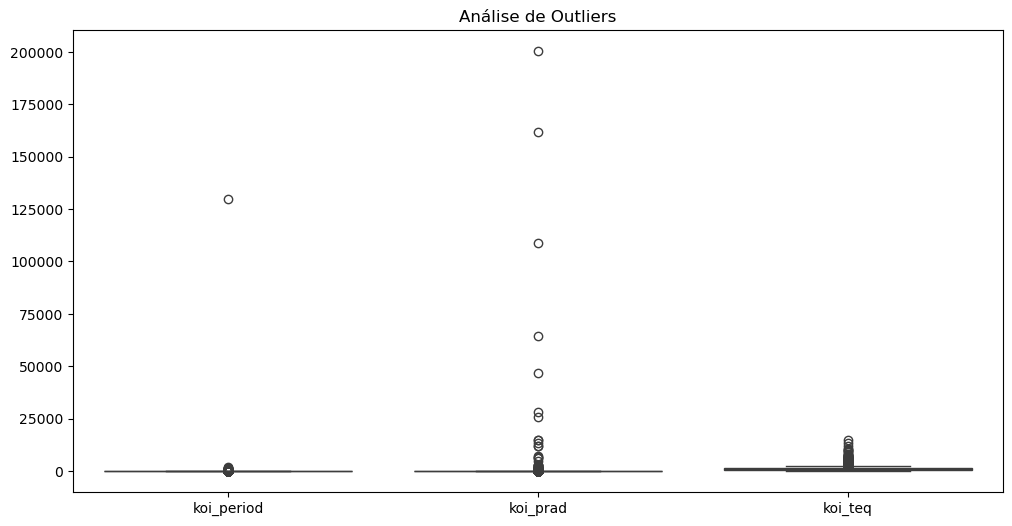

In [23]:
# Visualização de outliers com boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['koi_period', 'koi_prad', 'koi_teq']])
plt.title('Análise de Outliers')
plt.show()

## 9. Correção dos valores outliers

In [25]:
    # Correção de Outliers (remoção)

# def remover_outliers(df, col):
#    Q1 = df[col].quantile(0.25)
#    Q3 = df[col].quantile(0.75)
#    IQR = Q3 - Q1
#    limite_inferior = Q1 - 1.5 * IQR
#    limite_superior = Q3 + 1.5 * IQR
    # Mantém apenas os dados dentro dos limites
#    return df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

    # Aplicar para as colunas principais do dataset
#colunas_outliers = ['koi_period', 'koi_prad', 'koi_teq']

#for col in colunas_outliers:
#    tamanho_antes = df.shape[0]
#    df = remover_outliers(df, col)
#    tamanho_depois = df.shape[0]
#    print(f"🔍 Coluna '{col}': Removidos {tamanho_antes - tamanho_depois} registros considerados outliers.")


    Em contextos científicos, como o estudo de exoplanetas, valores considerados outliers podem não representar erros ou inconsistências, mas sim fenômenos raros e reais. Por exemplo, planetas muito maiores ou mais quentes do que o padrão podem indicar casos extremos que são, justamente, de interesse na pesquisa.

---
## ✅ Dados prontos para Análise e Modelagem

O dataset foi limpo, padronizado e preparado para ser utilizado em análises exploratórias e modelos de Machine Learning.